<a href="https://colab.research.google.com/github/Jake-LJH/ML/blob/main/CA2_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning - Image Classifier

## Background
Implement an image classifier using a deep learning network. 

[Hint: You may wish to refer to papers on successful DL architectures such as AlexNet]

###Tasks
1.	Write the code to solve the prediction task. Normally you would be using TensorFlow/Keras, but if you'd prefer to work with your own implementation of learning algorithms, or some other toolkit, that is fine.
2.	Write a short report (e.g. in Notebook) detailing your implementation, your experiments and analysis. In particular, we'd like to know:

  *	How is your prediction task defined? And what is the meaning of the output variable?
  *	How do you represent your data as features?
  *	Did you process the features in any way?
  *	Did you bring in any additional sources of data?
  *	How did you select which DL model to use?
  *	Did you try to optimise the learning algorithm, and in that case how?
  *	How do you evaluate the quality of your system?
  *	Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix.
  *	Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)
  *	Provide a reference section for any papers, online articles, books, publications that you have referenced.



In [10]:
# Import libraries from Tensorflow keras and python
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.optimizers import SGD

In [11]:
K.set_image_data_format('channels_last')
np.random.seed(0)

In [12]:
# Load the dataset
(XTrain, YTrain), (xTest, yTest) = mnist.load_data()

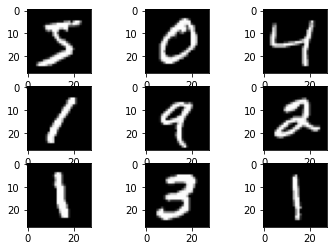

In [13]:
# Plot out the images as grey scale
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(XTrain[i], cmap=plt.get_cmap('gray'))
plt.show()

# Creating the model

In this section, I will be using 2 different models taken from 2 different source and compare the results with each other.

Model 1 has only 2 Convolution layer with 40 and 50 filters respectively, before Flattening it and pass into a Dense layer.

Model 2 started off with only a Convolution layer with 32 filters and passed on to a 2DMaxPooling layer straigh away before moving on to 2 Convolution layers with 64 filters and another 2D MaxPooling layer before Flatterning it and proceeded to 2 Dense layer. 

In [14]:
# Create the model
def model_1():
  model_1 = Sequential()
  model_1.add(Conv2D(filters=40, kernel_size=5, padding='same',
                input_shape=(28,28,1), activation='relu'))
  model_1.add(Conv2D(filters=50, kernel_size=5, padding='same',
                activation='relu'))

  #Flatten the 2D into 1D data
  model_1.add(Flatten())

  # Pass it into NN (Dense Layers)
  model_1.add(Dense(units=10, activation='softmax'))
  model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model_1

In [15]:
def model_2():
  model_2 = Sequential()
  model_2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model_2.add(MaxPooling2D((2, 2)))
  model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model_2.add(MaxPooling2D((2, 2)))
  model_2.add(Flatten())
  model_2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model_2.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model_2

In [16]:
# Reshape the dataset to comply with the input size above
XTrain = XTrain.reshape((XTrain.shape[0],28,28,1))
xTest = xTest.reshape((xTest.shape[0],28,28,1))

# Convert from integer to floats
XTrain = XTrain.astype('float32')
xTest = xTest.astype('float32')

# Normalise the image
XTrain = XTrain/255.0
xTest = xTest/255.0

# Convert target to categorical
YTrain = np_utils.to_categorical(YTrain)
yTest = np_utils.to_categorical(yTest)

In [18]:
model_1 = model_1()
model_1.fit(x=XTrain, y=YTrain, epochs=32, batch_size=100, validation_steps=0.2)

Epoch 1/32
600/600 [==============================] - 48s 7ms/step - loss: 0.3010 - accuracy: 0.9065
Epoch 2/32
600/600 [==============================] - 4s 6ms/step - loss: 0.0460 - accuracy: 0.9864
Epoch 3/32
600/600 [==============================] - 4s 6ms/step - loss: 0.0304 - accuracy: 0.9902
Epoch 4/32
600/600 [==============================] - 4s 6ms/step - loss: 0.0192 - accuracy: 0.9940
Epoch 5/32
600/600 [==============================] - 4s 6ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 6/32
600/600 [==============================] - 4s 6ms/step - loss: 0.0105 - accuracy: 0.9966
Epoch 7/32
600/600 [==============================] - 4s 6ms/step - loss: 0.0096 - accuracy: 0.9967
Epoch 8/32
600/600 [==============================] - 4s 6ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 9/32
600/600 [==============================] - 4s 7ms/step - loss: 0.0051 - accuracy: 0.9981
Epoch 10/32
600/600 [==============================] - 4s 6ms/step - loss: 0.0042 - accuracy: 0.998

In [19]:
model_2 = model_2()
model_2.fit(x=XTrain, y=YTrain, epochs=32, batch_size=100, validation_steps=0.2)

Epoch 1/32
600/600 [==============================] - 4s 4ms/step - loss: 0.4065 - accuracy: 0.8689
Epoch 2/32
600/600 [==============================] - 3s 4ms/step - loss: 0.0613 - accuracy: 0.9815
Epoch 3/32
600/600 [==============================] - 3s 4ms/step - loss: 0.0404 - accuracy: 0.9879
Epoch 4/32
600/600 [==============================] - 2s 4ms/step - loss: 0.0317 - accuracy: 0.9894
Epoch 5/32
600/600 [==============================] - 2s 4ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 6/32
600/600 [==============================] - 3s 4ms/step - loss: 0.0194 - accuracy: 0.9941
Epoch 7/32
600/600 [==============================] - 3s 4ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 8/32
600/600 [==============================] - 3s 4ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 9/32
600/600 [==============================] - 3s 4ms/step - loss: 0.0095 - accuracy: 0.9973
Epoch 10/32
600/600 [==============================] - 2s 4ms/step - loss: 0.0076 - accuracy: 0.9980

Result Anaylsis:

The results from Model 1 had an accuracy of 0.9994 which was pretty high and very close to 1. But Model 2 had an accuracy of 1 by the 23rd Epoch!

This is explained by the increase the depth of the model feature extractor with more convolutional and pooling layers using the VGG convolution neural network (Visual Geometry Group).

The key innovation in this architecture was the definition and repetition of what we will refer to as [VGG-blocks.](url:https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/) These are groups of convolutional layers that use small filters (e.g. 3×3 pixels) followed by a max pooling layer. It is also said to be very effective at extraction features from images. 

Lets see how it predicts with the test data....

Model 1 Predicted: [2]
 [[5.8919113e-19 8.5735283e-27 1.0000000e+00 5.7664133e-34 4.5526324e-29
  8.8839166e-37 4.2481900e-19 3.7197185e-38 4.2282297e-31 1.9238365e-27]]
Model 2 Predicted: [2]
 [[1.1370504e-14 1.1098986e-12 1.0000000e+00 3.1358365e-20 5.6503412e-23
  2.8664530e-27 2.2511086e-18 1.0777353e-18 1.7557845e-15 6.5057492e-19]]


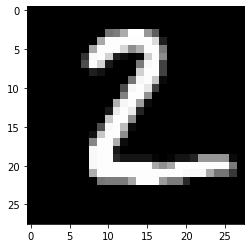

In [47]:
# Show some result from the testing data
from keras_preprocessing.image import img_to_array, load_img

test_index = 1
# Plot the image
plt.imshow(xTest[test_index].reshape(28,28), cmap=plt.get_cmap('gray'))
x = img_to_array(xTest[test_index])
x = np.expand_dims(x, axis=0)
pred_1 = np.argmax(model_1.predict(x), axis=-1)
pred_prob_1 = model_1.predict(x)
print('Model 1 Predicted: {}\n'.format(pred_1), pred_prob_1)

pred_2 = np.argmax(model_2.predict(x), axis=-1)
pred_prob_2 = model_2.predict(x)
print('Model 2 Predicted: {}\n'.format(pred_2), pred_prob_2)

Both results had predicted correctly on the test data, because both had a very high accuracy of close to 1.

But what about predicting from a different source?


In [39]:
from google.colab import files
file = files.upload()

Saving 5.jpg to 5.jpg


In [40]:
file.keys()

dict_keys(['5.jpg'])

Model 1 Predicted: [5]
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Model 2 Predicted: [5]
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


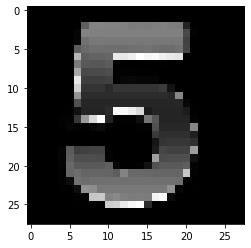

In [48]:
fn = '/content/5.jpg'
img = load_img(path=fn, target_size=(28,28,1), color_mode='grayscale')
img = np.invert(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

# Process the image for prediction

x = img_to_array(img=img)
x = np.expand_dims(x, axis=0)
pred_1 = np.argmax(model_1.predict(x), axis=-1)
pred_prob_1 = model_1.predict(x)
print('Model 1 Predicted: {}\n'.format(pred_1), pred_prob_1)

pred_2 = np.argmax(model_2.predict(x), axis=-1)
pred_prob_2 = model_2.predict(x)
print('Model 2 Predicted: {}\n'.format(pred_2), pred_prob_2)

# Conclusion

It seems that results for both models are highly accurate with both getting the same predicted result each time correctly and wrongly when reading more complicated images. However, through the Epoch accuracy results, Model 2 performs better with using only around 22 epoch to achieve an accuracy of 1.

More research is needed to improve on more complex images to get better predictment.

In [33]:
# Save the model
filename = 'digit_mnist_apml.h5'
model_2.save_weights(filepath= filename, overwrite=True)

In [ ]:
# Load the model
filename = '/content/digit_mnist_apml.h5'
model_2.load_weights(filepath=filename)